In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
import seaborn as sns
import json
import openweathermapy.core as owm
from pprint import pprint

#import API key
from config import api_key

In [2]:
# Create empty data frame and add columns for city, country, latitude and longitude
cities_df = pd.DataFrame()
cities_df["City"] = ""
cities_df["Country"] = ""

# Randomly generate numbers for latitude and longitude and loop through 500 times
cities_df["Lat"] = [np.random.uniform(-90, 90) for x in range(1500)]
cities_df["Lng"] = [np.random.uniform(-180, 180) for x in range(1500)]

# Use latitude and longitude to find city and country by using interrows and citipy
for index, row in cities_df.iterrows():
    lat = row["Lat"]
    lng = row["Lng"]
    cities_df.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)
    
# Delete any possible duplicate cities and reset index
cities_df = cities_df.drop_duplicates(["City", "Country"])
cities_df = cities_df.reset_index()

# Update data frame to just city and country column
cities_df = cities_df[["City", "Country"]]
cities_df = cities_df.iloc[:500]
cities_df

C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


,City,Country
0,hilo,us
1,illoqqortoormiut,gl
2,bakel,sn
3,mahebourg,mu
4,lodja,cd
5,polson,us
6,grand river south east,mu
7,krasnoselkup,ru
8,hithadhoo,mv
9,rikitea,pf


In [3]:
# Perform API calls and display results in Data Frame
cities_df["Cloudiness (%)"] = ""
cities_df["Date"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp (F)"] = ""
cities_df["Wind Speed (mph)"] = ""

# Create row counter and set it to one
row_counter = 1
# Create a dictionary with parameters
settings = {"appid": api_key, "units": "imperial"}
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Create query url
query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="

print("Let The Data Retrieval Begin")
print("---------------------------")
# Iterrows in to loop city row in query url
for index, row in cities_df.iterrows():
    try:
        cities_response = requests.get(query_url + row["City"] + "," + row["Country"])
        print(f"Processing Record {row_counter} | {row['City']}, {row['Country']}")
        #print(cities_response.url)
        # Update row counter
        row_counter += 1
    
        # Turn cities response into json with owm module
        cities_response = owm.get_current(row["City"], **settings)
    
        # Create summary variables to retrieve certain data from cities response
        city_summary = ["name"] 
        cloud_summary = ["clouds.all"]
        country_summary = ["sys.country"]
        date_summary = ["dt"]
        humidity_summary = ["main.humidity"]
        lat_summary = ["coord.lat"]
        lon_summary = ["coord.lon"]
        temp_summary = ["main.temp"] 
        wind_summary = ["wind.speed"]
        

  # Add retrieved data into cities_list data frame
        cities_df.set_value(index, "Cloudiness (%)", cities_response(*cloud_summary))
        cities_df.set_value(index, "Date", cities_response(*date_summary))
        cities_df.set_value(index, "Humidity (%)", cities_response(*humidity_summary))
        cities_df.set_value(index, "Lat", cities_response(*lat_summary))
        cities_df.set_value(index, "Lng", cities_response(*lon_summary))
        cities_df.set_value(index, "Max Temp (F)", cities_response(*temp_summary))
        cities_df.set_value(index, "Wind Speed (mph)", cities_response(*wind_summary))
    except:
        print(f"**Weather data does not exist for {row['City']}, {row['Country']}**")
        continue
 
    
print("---------------------------")
print("Your Data Has Arrived!")
print("---------------------------")


Let The Data Retrieval Begin
---------------------------
Processing Record 1 | hilo, us
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=hilo,us


C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future rele

Processing Record 2 | illoqqortoormiut, gl
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=illoqqortoormiut,gl
**Weather data does not exist for illoqqortoormiut, gl**
Processing Record 3 | bakel, sn
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=bakel,sn
Processing Record 4 | mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=mahebourg,mu
Processing Record 5 | lodja, cd
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=lodja,cd
Processing Record 6 | polson, us
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=polson,us
Processing Record 7 | grand river south east, mu
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=grand%20river%20south%20east,mu
**Weath

Processing Record 54 | bow island, ca
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=bow%20island,ca
Processing Record 55 | cockburn town, tc
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=cockburn%20town,tc
Processing Record 56 | tuktoyaktuk, ca
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=tuktoyaktuk,ca
Processing Record 57 | touros, br
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=touros,br
Processing Record 58 | maiduguri, ng
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=maiduguri,ng
Processing Record 59 | cape town, za
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=cape%20town,za
Processing Record 60 | sitka, us
http://api.openweathermap.org/data/

Processing Record 108 | plettenberg bay, za
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=plettenberg%20bay,za
Processing Record 109 | lata, sb
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=lata,sb
Processing Record 110 | horsham, au
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=horsham,au
Processing Record 111 | hobart, au
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=hobart,au
Processing Record 112 | saskylakh, ru
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=saskylakh,ru
Processing Record 113 | santiago, mx
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=santiago,mx
Processing Record 114 | jamestown, sh
http://api.openweathermap.org/data/2.5/weather

**Weather data does not exist for ondorhaan, mn**
Processing Record 160 | port-cartier, ca
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=port-cartier,ca
Processing Record 161 | georgetown, sh
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=georgetown,sh
Processing Record 162 | abaza, ru
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=abaza,ru
Processing Record 163 | ferrol, es
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=ferrol,es
Processing Record 164 | bambous virieux, mu
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=bambous%20virieux,mu
Processing Record 165 | nouadhibou, mr
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=nouadhibou,mr
Processing Recor

Processing Record 211 | namibe, ao
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=namibe,ao
Processing Record 212 | lac du bonnet, ca
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=lac%20du%20bonnet,ca
Processing Record 213 | severo-kurilsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=severo-kurilsk,ru
Processing Record 214 | eureka, us
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=eureka,us
Processing Record 215 | anori, br
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=anori,br
Processing Record 216 | saldanha, za
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=saldanha,za
Processing Record 217 | tilichiki, ru
http://api.openweathermap.org/data/2.5

Processing Record 264 | barbar, sd
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=barbar,sd
**Weather data does not exist for barbar, sd**
Processing Record 265 | zhaotong, cn
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=zhaotong,cn
Processing Record 266 | narsaq, gl
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=narsaq,gl
Processing Record 267 | aksarka, ru
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=aksarka,ru
Processing Record 268 | rawannawi, ki
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=rawannawi,ki
**Weather data does not exist for rawannawi, ki**
Processing Record 269 | mocuba, mz
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=mocuba,mz
Pro

Processing Record 315 | fairbanks, us
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=fairbanks,us
Processing Record 316 | pisco, pe
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=pisco,pe
Processing Record 317 | antofagasta, cl
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=antofagasta,cl
Processing Record 318 | jalalabad, in
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=jalalabad,in
Processing Record 319 | makakilo city, us
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=makakilo%20city,us
Processing Record 320 | coahuayana, mx
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=coahuayana,mx
Processing Record 321 | hasaki, jp
http://api.openweathermap.org/dat

Processing Record 368 | rio gallegos, ar
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=rio%20gallegos,ar
Processing Record 369 | ishigaki, jp
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=ishigaki,jp
Processing Record 370 | airai, pw
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=airai,pw
Processing Record 371 | burns lake, ca
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=burns%20lake,ca
Processing Record 372 | ola, ru
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=ola,ru
Processing Record 373 | garmsar, ir
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=garmsar,ir
Processing Record 374 | charagua, bo
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 421 | mezen, ru
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=mezen,ru
Processing Record 422 | kuching, my
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=kuching,my
Processing Record 423 | monrovia, lr
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=monrovia,lr
Processing Record 424 | prince rupert, ca
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=prince%20rupert,ca
Processing Record 425 | zyryanovsk, kz
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=zyryanovsk,kz
Processing Record 426 | urumqi, cn
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=urumqi,cn
**Weather data does not exist for urumqi, cn**
Processing Record 427 | quatre cocos,

Processing Record 473 | alice springs, au
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=alice%20springs,au
Processing Record 474 | el retorno, co
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=el%20retorno,co
Processing Record 475 | gadarwara, in
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=gadarwara,in
Processing Record 476 | cabedelo, br
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=cabedelo,br
Processing Record 477 | nsanje, mw
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=nsanje,mw
Processing Record 478 | thilogne, sn
http://api.openweathermap.org/data/2.5/weather?appid=1faf16394204bdcca97395e5c757030b&units=imperial&q=thilogne,sn
**Weather data does not exist for thilogne, sn**
Processing Record 479 |

In [16]:
cities_df.count()

City                500
Country             500
Cloudiness (%)      500
Date                500
Humidity (%)        500
Lat                 500
Lng                 500
Max Temp (F)        500
Wind Speed (mph)    500
dtype: int64

In [15]:

cities_df.head(5)

,City,Country,Cloudiness (%),Date,Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,hilo,us,75,1553914410,61,19.71,-155.08,73.31,6.93
1,illoqqortoormiut,gl,,,,,,,
2,bakel,sn,56,1553914444,36,14.9,-12.46,81.93,14.65
3,mahebourg,mu,20,1553914144,88,-20.41,57.7,74.3,4.7
4,lodja,cd,36,1553914445,97,-3.52,23.6,72.66,3.13


In [5]:
# Save data to a CSV file
cities_df.to_csv("Analysis/city_data.csv")

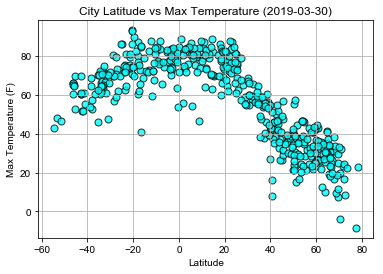

In [6]:
# Temperature (F) vs. Latitude
timestamp = cities_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)


Lat = pd.to_numeric(cities_df["Lat"])
Temp = pd.to_numeric(cities_df["Max Temp (F)"])

plt.title(f"City Latitude vs Max Temperature ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.style.use('seaborn')
plt.grid(True)
plt.scatter(x=Lat, y=Temp, edgecolor="black", linewidths=1, marker="o", color="cyan", alpha=0.8, label="City")

# Save the figure
plt.savefig("Analysis/lat_temp.png")

plt.show()

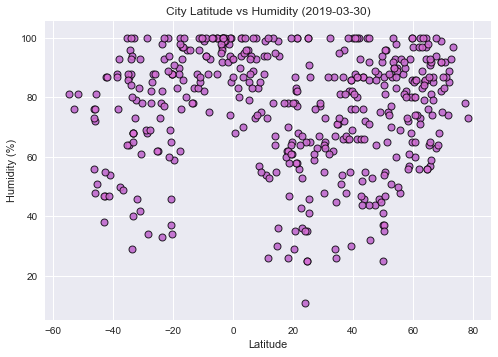

In [10]:
#Build a scatter plot for Latitude vs. Humidity (%)

Hum = pd.to_numeric(cities_df["Humidity (%)"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_df, x=Lat, y=Hum, fit_reg=False)
plt.title(f"City Latitude vs Humidity ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x=Lat, y=Hum, color="orchid", linewidth=1, alpha=0.8, edgecolor="black", marker="o")

# Save the figure
plt.savefig("Analysis/lat_humid.png")

# Show plot
plt.show()

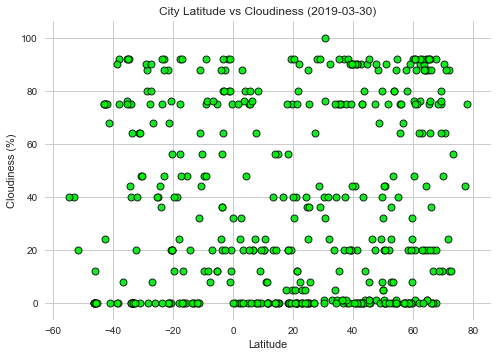

In [11]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

Cloud = pd.to_numeric(cities_df["Cloudiness (%)"])

with sns.axes_style("whitegrid"):
    sns.regplot(data=cities_df, x=Lat, y=Cloud, fit_reg=False)
plt.title(f"City Latitude vs Cloudiness ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x=Lat, y=Cloud, color="lime", alpha=0.8, marker="o", linewidth=1, edgecolor="black")

# Save the figure
plt.savefig("Analysis/lat_cloudy.png")

# Show plot
plt.show()

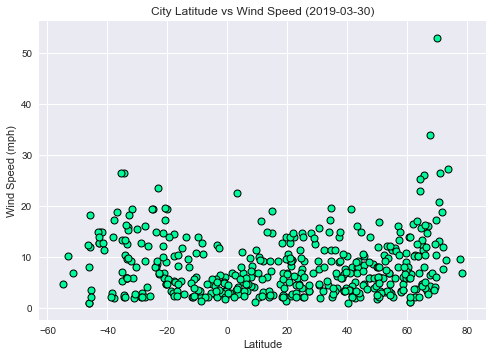

In [12]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

Wind = pd.to_numeric(cities_df["Wind Speed (mph)"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_df, x=Lat, y=Wind, fit_reg=False)
plt.title(f"City Latitude vs Wind Speed ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x=Lat, y=Wind, color="mediumspringgreen", alpha=1, linewidth=1, edgecolor="black")

# Save the figure
plt.savefig("Analysis/lat_windy.png")

# Show plot
plt.show()